<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 3 </H3>
<hr style="height:2px;border:none"/>



# Reglas & Formalidades

* Pueden trabajar en equipos de 2 a 3 personas. 
* Los equipos deben ser inscritos antes del 10 de Noviembre.
* Pueden reusar código visto en clases y/o recolectar código/ideas de otros sitios, mencionando al autor y entregando un link a la fuente. 
* Si resulta necesaria, la intervención de personas ajenas al grupo (e.g. experto) debe ser declarada y justificada.
* Tener roles dentro del equipo está bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado. 

# Entregables 




> * **Video:** Se debe preparar un video explicativo de **12 a 15 minutos** donde se describe la metodología utilizada, los resultados obtenidos y las conclusiones de la experiencia. 

> * **Código:** Se debe enviar un jupyter notebook con el código utilizado, de modo que sea posible **reproducir los resultados** presentados. Como alternativa, se puede entregar un link Github con el código fuente, incluyendo instrucciones precisas para ejecutar los experimentos. En cualquier caso (notebook o repo) el código debe estar ordenado y seccionado apropiadamente.

> * **Conformidad Ética:** Se debe incluir una breve declaración ética en que se indique que el trabajo que se está enviando es un trabajo original, desarollado por los autores en conformidad con todas reglas antes mencionadas. Se debe también mencionar brevemente cuál fue la contribución de cada miembro del equipo. La declaración puede ser parte del notebook o estar en un archivo dentro del repo.

> * **Defensa en vivo (video-conferencia):** El día de clases agendado para la discusión del taller, se seleccionarán aleatoriamente algunos equipos que presentarán oralmente su trabajo ante el curso. Los autores serán evaluados considerando la discusión y debate que generen entre sus pares. Los puntos obtenidos (positivos o negativos) se sumarán a la nota final de taller.

# Fechas

> * Defensas: 23 de Diciembre 12:00 hrs.
> * Fecha de entrega de vídeo: 23 de Diciembre 12:00 Hrs.
> * Fecha de entrega de Jupyter (notebook): 23 de Diciembre 12:00 hrs.


# Desafío Kaggle 

A medida que nuestro conocimiento sobre la microbiota progresa, resulta cada vez más claro que estos ecosistemas tienen un rol fundamental en el correcto funcionamiento del organismo, desarrollando funciones homeostáticas que condicionan nuestra salud. Por ejemplo, se ha demostrado que la microbiota tiene un rol clave en la aparición de enfermedades como la diabetes tipo 2 y la obesidad. También se ha documentado ampliamente su rol en la formación de algunos cánceres y la respectiva respuesta del organismo al tratamiento. Más recientemente, la conexión de la microbiota intestinal con el sistema nervioso central (a través del nervio vago) también ha permitido relacionarla con trastornos como el autismo, la ansiedad, la depresión y la dependencia alcohólica.
  
Todo lo anterior sugiere que la composición de la microbiota podría ser utilizada predictor de diferentes enfermedades. La introducción de las técnicas de secuenciación masiva del ADN ha supuesto una verdadera revolución en esta linea de investigación, permitiendo obtener los perfiles de composición de una comunidad microbial con altísima resolución. Desafortundamente, el uso de estos datos para descubrir biomarcadores y predecir enfermedades está lejos de ser sencillo en buena parte por el altísimo número de predictores posibles (d) y el reducido número de muestras (n) de los que suele disponerse en un estudio clínico. 

Para acceder a loss detalles del desafío ingrese al siguiente link: https://www.kaggle.com/c/simbiontes/overview



## 1. Importación de librerías

In [1]:
# Fundamentals
import re
import pandas as pd
import numpy as np
import itertools

In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# tensorflow
from tensorflow.keras.metrics import AUC

In [ ]:
# Otras librerías
# pip install xgboost
from xgboost import XGBClassifier

## 2. Descripción Dataset

Se muestran algunos datos y características generales del dataset:

In [5]:
# Import train and test sets
train_abundance = pd.read_csv("./datasets/biomedata_train_abundance.csv")
train_marker = pd.read_csv("./datasets/biomedata_train_marker.csv")
test_abundance = pd.read_csv("./datasets/biomedata_test_abundance.csv")
test_marker = pd.read_csv("./datasets/biomedata_test_marker.csv")

In [6]:
train_abundance.head()

,Unnamed: 0,Cirrhosis,code_study,country,gender,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pseudomonadales|f__Pseudomonadaceae|g__Pseudomonas|s__Pseudomonas_fragi,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Pseudoxanthomonas|s__Pseudoxanthomonas_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Rhodanobacter|s__Rhodanobacter_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_citri,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Brachyspiraceae|g__Brachyspira|s__Brachyspira_pilosicoli,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis
0,0,1.0,Quin_gut_liver_cirrhosis,china,female,0.02959,0.00955,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0,Quin_gut_liver_cirrhosis,china,male,0.00000,0.00000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.0,Quin_gut_liver_cirrhosis,china,male,0.00000,0.00000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.0,Quin_gut_liver_cirrhosis,china,female,0.29306,0.00000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.0,Quin_gut_liver_cirrhosis,china,male,0.00000,0.00000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_marker.head()

,Unnamed: 0,Cirrhosis,code_study,country,gender,gi|103485498|ref|NC_008048.1|:c103928-103680,gi|104773257|ref|NC_008054.1|:116729-117526,gi|104773257|ref|NC_008054.1|:1737697-1738332,gi|104773257|ref|NC_008054.1|:266275-267207,gi|104773257|ref|NC_008054.1|:294312-294563,...,gi|89892746|ref|NC_007907.1|:c3938880-3937900,gi|90581188|ref|NZ_AAOJ01000014.1|:76701-76972,gi|91774356|ref|NC_007947.1|:c416906-416292,gi|92112136|ref|NC_007963.1|:485202-485741,gi|92115633|ref|NC_007964.1|:c3043219-3042695,gi|93004831|ref|NC_007969.1|:1110067-1110642,gi|93004831|ref|NC_007969.1|:1986617-1987513,gi|94502223|ref|NZ_AANL01000001.1|:c8848-8444,gi|94676460|ref|NC_007984.1|:c601098-600646,gi|94991497|ref|NC_008023.1|:148294-148941
0,0,1.0,Quin_gut_liver_cirrhosis,china,female,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0,Quin_gut_liver_cirrhosis,china,male,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.0,Quin_gut_liver_cirrhosis,china,male,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.0,Quin_gut_liver_cirrhosis,china,female,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.0,Quin_gut_liver_cirrhosis,china,male,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_abundance.describe()

,Unnamed: 0,Cirrhosis,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pseudomonadales|f__Pseudomonadaceae|g__Pseudomonas|s__Pseudomonas_fragi,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Pseudoxanthomonas|s__Pseudoxanthomonas_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Rhodanobacter|s__Rhodanobacter_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_citri,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Brachyspiraceae|g__Brachyspira|s__Brachyspira_pilosicoli,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis
count,621.000000,174.000000,621.000000,621.00000,621.000000,621.000000,621.000000,621.000000,432.000000,621.000000,...,258.0,258.000000,258.000000,258.0,258.0,258.000000,258.000000,258.000000,258.000000,258.000000
mean,310.000000,0.505747,0.134980,0.01213,0.004457,0.000204,0.001529,0.000728,0.000021,0.001153,...,0.0,0.000037,0.000003,0.0,0.0,0.000112,0.000011,0.000011,0.000616,0.000045
std,179.411538,0.501410,0.592962,0.08049,0.049055,0.001524,0.013730,0.005011,0.000344,0.005223,...,0.0,0.000587,0.000045,0.0,0.0,0.001801,0.000176,0.000182,0.009902,0.000605
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,155.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,310.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,465.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,620.000000,1.000000,7.733550,1.36940,1.023360,0.025480,0.303540,0.105130,0.006820,0.074190,...,0.0,0.009430,0.000730,0.0,0.0,0.028930,0.002820,0.002930,0.159050,0.009510


In [9]:
train_marker.describe()

,Unnamed: 0,Cirrhosis,gi|103485498|ref|NC_008048.1|:c103928-103680,gi|104773257|ref|NC_008054.1|:116729-117526,gi|104773257|ref|NC_008054.1|:1737697-1738332,gi|104773257|ref|NC_008054.1|:266275-267207,gi|104773257|ref|NC_008054.1|:294312-294563,gi|104773257|ref|NC_008054.1|:444407-444904,gi|104773257|ref|NC_008054.1|:54492-55274,gi|104773257|ref|NC_008054.1|:621607-622221,...,gi|89892746|ref|NC_007907.1|:c3938880-3937900,gi|90581188|ref|NZ_AAOJ01000014.1|:76701-76972,gi|91774356|ref|NC_007947.1|:c416906-416292,gi|92112136|ref|NC_007963.1|:485202-485741,gi|92115633|ref|NC_007964.1|:c3043219-3042695,gi|93004831|ref|NC_007969.1|:1110067-1110642,gi|93004831|ref|NC_007969.1|:1986617-1987513,gi|94502223|ref|NZ_AANL01000001.1|:c8848-8444,gi|94676460|ref|NC_007984.1|:c601098-600646,gi|94991497|ref|NC_008023.1|:148294-148941
count,621.000000,174.000000,432.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,...,258.000000,258.000000,258.0,258.000000,258.000000,258.0,258.000000,258.000000,258.0,258.000000
mean,310.000000,0.505747,0.009259,0.024155,0.022544,0.019324,0.019324,0.022544,0.024155,0.017713,...,0.003876,0.003876,0.0,0.003876,0.003876,0.0,0.003876,0.003876,0.0,0.003876
std,179.411538,0.501410,0.095890,0.153653,0.148565,0.137771,0.137771,0.148565,0.153653,0.132014,...,0.062257,0.062257,0.0,0.062257,0.062257,0.0,0.062257,0.062257,0.0,0.062257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
25%,155.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
50%,310.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
75%,465.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
max,620.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000


## 3. Exploración de datos

In [11]:
train_marker.isna().sum()

Unnamed: 0                                         0
Cirrhosis                                        447
code_study                                         0
country                                            0
gender                                             0
                                                ... 
gi|93004831|ref|NC_007969.1|:1110067-1110642     363
gi|93004831|ref|NC_007969.1|:1986617-1987513     363
gi|94502223|ref|NZ_AANL01000001.1|:c8848-8444    363
gi|94676460|ref|NC_007984.1|:c601098-600646      363
gi|94991497|ref|NC_008023.1|:148294-148941       363
Length: 153953, dtype: int64

## 4 Preprocesamiento de datos

### 4.1 Data Cleaning

Se concatena la información a nivel de especie y cepa:

In [12]:
def data_merge(abundance,marker):
  dataset = pd.concat([abundance, marker], axis=1, join='inner')
  dataset = dataset.loc[:,~dataset.columns.duplicated()]
  return dataset

1. Se reemplazan los valores Nan por 0. 
2. Se utiliza one hot encoding para representar el genero y el país de origen del individuo. 
3. Se llevan los datos a tipo numérico.
4. Se separan las características que son parte del target.

In [96]:
def preprocessing(dataset,name,test=False):
  dataset = dataset.fillna(0)

  ohe_gender = pd.get_dummies(dataset.gender, prefix='gender')
  dataset["gender_-"] = ohe_gender["gender_-"]
  dataset["gender_male"] = ohe_gender["gender_male"]
  dataset["gender_female"] = ohe_gender["gender_female"]
  ohe_country = pd.get_dummies(dataset.country, prefix='country')
  dataset["country_china"] = ohe_country["country_china"]
  dataset["country_denmark"] = ohe_country["country_denmark"]
  
  dataset = dataset.apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)
  dataset = dataset.drop(columns=["gender","code_study","country"])
  
  if test:
    dataset = dataset.drop(columns=["Unnamed: 0",'Cirrhosis','Obesity','Diabetes'])
    return dataset

  Y = dataset[['Cirrhosis','Obesity','Diabetes']]
  dataset = dataset.drop(columns=['Unnamed: 0','Cirrhosis','Obesity','Diabetes'])
  
  return dataset, Y

### 4.2 Normalization

Se estandarizan los datos por la media y la desviación estándar.

In [15]:
def get_normalizer(dataset):
  scaler = StandardScaler()
  return scaler.fit(dataset)

### 4.3 Other attribute engineering tools

El método **VarianceThreshold** fue utilizado he introdujo mejoras al modelo eliminando aquellas variables con muy poca varianza, es decir, bajo aporte de información al modelo.

In [16]:
def getter_delete_low_variance(dataset,umbral=0):
  return VarianceThreshold(threshold=umbral).fit(dataset)

## 5. Model evaluation

Función para evaluar el modelo en el error de validación y de entrenamiento (se utilizó para verificar **sobre ajuste** y **seleccionar hiperparámetros**). Además, genera el submit para kaggle en caso de que se le indique:

In [17]:
def evaluar_modelo(X_train,y_train,model,X_val=None,y_val=None,X_test=None,test=None,params=dict(),submit=False,X=None,Y=None):
  if submit:
    # Se utiliza la clase OneVsRestClassifier para obtener una clasificador multilabel.
    modelo = OneVsRestClassifier(model(**params))
    X_train = X
    y_train = Y
    modelo = modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    test_submit = test
    test_submit['Cirrhosis'] = y_pred[:,0]
    test_submit['Obesity'] = y_pred[:,1]
    test_submit['Diabetes'] = y_pred[:,2]
    test_submit = test_submit.rename(columns = {"Unnamed: 0": "Id"})
    test_submit = test_submit[['Id','Cirrhosis','Obesity','Diabetes']]
    test_submit.to_csv("./submissions/submission-to-kaggle.csv", index=False)
    return modelo
  else:
    # Se utiliza la clase OneVsRestClassifier para obtener una clasificador multilabel.
    modelo = OneVsRestClassifier(model(**params))
    modelo = modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_val)
    y_pred_train = modelo.predict(X_train)
    auc = AUC(multi_label=True, thresholds=[0, 0.5])
    print(f'MAUC validación: {auc(y_val, y_pred)}')
    print(f'MAUC entrenamiento: {auc(y_train, y_pred_train)}')
    return modelo

## 6. Pipeline manual

In [144]:
# parametros
lv=True # Aplicar filtro de variables con poca varianza.
umbral=0 # Umbral de varianza para eliminar variables.
pca = True # Utilizar pca para el entrenamiento
best_result = True # Si está en true no se consideran las columnas gender y country en el entrenamiento (pero sí en el análisis de las variables más importantes)

Concatenación de los datos:

In [19]:
train_dm = data_merge(train_abundance,train_marker)
test_dm = data_merge(test_abundance,test_marker)

Preprocesamiento de los datos:

In [97]:
X_train_pp, Y_train = preprocessing(train_dm,"train_dm")
X_test_pp = preprocessing(test_dm,"test_dm",test=True)

Filtro de baja varianza:

In [143]:
if lv:
  print("antes:")
  print(X_train_pp.shape)
  if best_result:
    X_train_br = X_train_pp.drop(columns=["gender_-","gender_male","gender_female","country_china","country_denmark"])
    X_test_br = X_test_pp.drop(columns=["gender_-","gender_male","gender_female","country_china","country_denmark"])
    low_var = getter_delete_low_variance(X_train_br,umbral=0)
    X_train_lv = low_var.transform(X_train_br)
    X_test_lv = low_var.transform(X_test_br)
  else:
    low_var = getter_delete_low_variance(X_train_pp,umbral=0)
    X_train_lv = low_var.transform(X_train_pp)
    X_test_lv = low_var.transform(X_test_pp)
    
  # Volvemos a armar el dataframe filtrado
  X_train_lv_df = pd.DataFrame(data=X_train_lv[0:,0:],
                index=[i for i in range(X_train_lv.shape[0])],
                columns=['f'+str(i) for i in range(X_train_lv.shape[1])])
  X_test_lv_df = pd.DataFrame(data=X_test_lv[0:,0:],
                  index=[i for i in range(X_test_lv.shape[0])],
                  columns=['f'+str(i) for i in range(X_test_lv.shape[1])])
  print("despues:")
  print(X_train_lv.shape)

antes:
(621, 154661)
despues:
(621, 146670)


Estandarización de los datos:

In [145]:
if lv:
  normalizer = get_normalizer(X_train_lv_df)
  X_train_norm = normalizer.transform(X_train_lv_df)
  X_test_norm = normalizer.transform(X_test_lv_df)
else:
  normalizer = get_normalizer(X_train_pp)
  X_train_norm = normalizer.transform(X_train_pp)
  X_test_norm = normalizer.transform(X_test_pp)

#Y_train = pd.read_csv(cache_dir+"Y_train.csv")

Análisis de componentes principales:

In [146]:
# Se aplica PCA para obtener una representación de menor dimensionalidad 
# pero que posee gran parte de la información inicial.
pca = PCA(n_components=(25))
pca.fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

Separación en datos de entrenamiento y validación (**el conjunto de validación se utiliza para estimar el error en los datos de kaggle y la selección de hiperparámetros**)

In [147]:
if pca:
  X_train, X_val, y_train, y_val = train_test_split(X_train_pca, Y_train,test_size=0.3,random_state=42)
else:
  X_train, X_val, y_train, y_val = train_test_split(X_train_norm, Y_train,test_size=0.3,random_state=42)

## 7. Mejor resultado

El mejor resultado se obtuvo utilizando PCA con 25 componentes, filtro de baja varianza con umbral 0 (elimina aquellas variables que no aportan nada de información), ni se utilizan las columnas codificadas de gender, code_study y country. Se obtuvo score de 0.83248 en kaggle.

In [148]:
# Se obtuvo usando PCA con 25 componentes y umbral 0 en lv, sin utilizar gender, code_study y country
params = {"kernel":'linear', "gamma":1, "C":1,"class_weight":"balanced"}
print("Comienza evaluación de modelo")
print(evaluar_modelo(X_train,y_train,model=svm.SVC,X_val=X_val,
                     y_val=y_val,X_test=X_test_pca,params=params,
                     test=test_dm,submit=False,X=X_train_pca,Y=Y_train))

Comienza evaluación de modelo
MAUC validación: 0.8755908012390137
MAUC entrenamiento: 0.8964021801948547
OneVsRestClassifier(estimator=SVC(C=1, class_weight='balanced', gamma=1,
                                  kernel='linear'))


## 8. Pruebas de hiperparámetros

Se utilizan distintos valores de umbral para el filtro de baja varianza y cantidades de componentes principales a utilizar en el modelo. Además, se prueba una grilla de parámetros para cada combinación y modelo.

In [31]:
for umbral in [0,0.0005,0.01,0.1]:
  ######################## Low Variance ########################   
  low_var = getter_delete_low_variance(X_train_pp,umbral=umbral)
  X_train_lv = low_var.transform(X_train_pp)
  X_test_lv = low_var.transform(X_test_pp)
  X_train_lv_df = pd.DataFrame(data=X_train_lv[0:,0:],
                index=[i for i in range(X_train_lv.shape[0])],
                columns=['f'+str(i) for i in range(X_train_lv.shape[1])])
  X_test_lv_df = pd.DataFrame(data=X_test_lv[0:,0:],
                  index=[i for i in range(X_test_lv.shape[0])],
                  columns=['f'+str(i) for i in range(X_test_lv.shape[1])])
  ######################## End Low Variance ########################   

  ######################## Data Standarization ########################   
  normalizer = get_normalizer(X_train_lv_df)
  X_train_norm = normalizer.transform(X_train_lv_df)
  X_test_norm = normalizer.transform(X_test_lv_df)
  ######################## End Data Standarization ########################  
    
  for n_comp in [12,25,150,600]:

    print("###########################################################")
    print(f'Probando hiperparámetros: n_comp: {n_comp},umbral: {umbral}')
    print("###########################################################")
    
    ######################## PCA ########################   
    pca = PCA(n_components=(n_comp))
    pca.fit(X_train_norm)
    X_train_pca = pca.transform(X_train_norm)
    X_test_pca = pca.transform(X_test_norm)
    ######################## End PCA ########################  
    
    X_train, X_val, y_train, y_val = train_test_split(X_train_pca, Y_train,test_size=0.3,random_state=42)
    
    models = {"svc": svm.SVC,"forest": RandomForestClassifier,"knn":KNeighborsClassifier,"tree":DecisionTreeClassifier}

    # En tipo de kernel no se considera rbf ya que, siempre da malos resultados
    grid = {"kernel":["linear","poly","sigmoid"],"max_depth":[3,5,7],
            "n_neighbors":[3,5,7],"gamma":["auto",0.2,0.7,1],"C":np.linspace(0.1,1,2),
            "n_estimators":[10,50,100,150,200],"class_weight":["balanced"]}

    param_per_model = {"svc": ["kernel","gamma","C","class_weight"],"forest":["max_depth","n_estimators","class_weight"],
                       "knn":["n_neighbors"],"tree":["max_depth","class_weight"]}
    grid_per_model = {}

    for model_params, params in param_per_model.items():
      lista_params = []
      for param in params:
        lista_params.append(grid[param])
      combinations = list(itertools.product(*lista_params))
      grid_per_model[model_params] = [dict(zip(params, combination)) for combination in combinations]

    for name, model in models.items():
      for params in grid_per_model[name]:
        print('-----------------------------------')
        print(f'Evaluando modelo: {name}')
        print(f'Con los siguientes parámetros: {params}')
        evaluar_modelo(X_train,y_train,model=models[name],X_val=X_val,
                         y_val=y_val,X_test=X_test_pca,params=params,
                         test=test_dm,submit=False,X=X_train_pca,Y=Y_train)
        print('-----------------------------------')

###########################################################
Probando hiperparámetros: n_comp: 12,umbral: 0
###########################################################
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 'auto', 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.8693209290504456
MAUC entrenamiento: 0.8725808262825012
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 'auto', 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.8693209290504456
MAUC entrenamiento: 0.8725808262825012
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 0.2, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.8693209290504456
MAUC entrenamiento: 0.8725808262825012
-----------------------------------
--------

MAUC validación: 0.8392705917358398
MAUC entrenamiento: 0.9136271476745605
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 5, 'n_estimators': 100, 'class_weight': 'balanced'}
MAUC validación: 0.8257970213890076
MAUC entrenamiento: 0.913668155670166
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 5, 'n_estimators': 150, 'class_weight': 'balanced'}
MAUC validación: 0.8591362833976746
MAUC entrenamiento: 0.9217672944068909
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 5, 'n_estimators': 200, 'class_weight': 'balanced'}
MAUC validación: 0.8434364199638367
MAUC entrenamiento: 0.9165536761283875
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes par

MAUC validación: 0.7692591547966003
MAUC entrenamiento: 0.7286181449890137
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'sigmoid', 'gamma': 0.2, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.7942037582397461
MAUC entrenamiento: 0.7533068656921387
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'sigmoid', 'gamma': 0.2, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.7565944194793701
MAUC entrenamiento: 0.7222256660461426
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'sigmoid', 'gamma': 0.7, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.8097606301307678
MAUC entrenamiento: 0.7616086602210999
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los s

MAUC validación: 0.7494774460792542
MAUC entrenamiento: 0.9264326095581055
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 0.7, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.7494774460792542
MAUC entrenamiento: 0.9264326095581055
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 0.7, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.7494774460792542
MAUC entrenamiento: 0.9264326095581055
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 1, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.7494774460792542
MAUC entrenamiento: 0.9264326095581055
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguie

MAUC validación: 0.6777704358100891
MAUC entrenamiento: 0.9008355140686035
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 7, 'n_estimators': 100, 'class_weight': 'balanced'}
MAUC validación: 0.6820124983787537
MAUC entrenamiento: 0.9063951373100281
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 7, 'n_estimators': 150, 'class_weight': 'balanced'}
MAUC validación: 0.6640100479125977
MAUC entrenamiento: 0.899656355381012
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 7, 'n_estimators': 200, 'class_weight': 'balanced'}
MAUC validación: 0.6667613983154297
MAUC entrenamiento: 0.9007296562194824
-----------------------------------
-----------------------------------
Evaluando modelo: knn
Con los siguientes paráme

MAUC validación: 0.8421924710273743
MAUC entrenamiento: 0.7791733145713806
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'sigmoid', 'gamma': 1, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.810228168964386
MAUC entrenamiento: 0.7664820551872253
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 3, 'n_estimators': 10, 'class_weight': 'balanced'}
MAUC validación: 0.7186665534973145
MAUC entrenamiento: 0.8408300280570984
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 3, 'n_estimators': 50, 'class_weight': 'balanced'}
MAUC validación: 0.7362176775932312
MAUC entrenamiento: 0.8840311169624329
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes pa

MAUC validación: 0.759232223033905
MAUC entrenamiento: 0.9290208220481873
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'poly', 'gamma': 'auto', 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.759232223033905
MAUC entrenamiento: 0.9290208220481873
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'poly', 'gamma': 0.2, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.759232223033905
MAUC entrenamiento: 0.9290208220481873
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'poly', 'gamma': 0.2, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.759232223033905
MAUC entrenamiento: 0.9290208220481873
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes 

MAUC entrenamiento: 0.7996315956115723
-----------------------------------
-----------------------------------
Evaluando modelo: tree
Con los siguientes parámetros: {'max_depth': 3, 'class_weight': 'balanced'}
MAUC validación: 0.8243314623832703
MAUC entrenamiento: 0.8507533073425293
-----------------------------------
-----------------------------------
Evaluando modelo: tree
Con los siguientes parámetros: {'max_depth': 5, 'class_weight': 'balanced'}
MAUC validación: 0.821304976940155
MAUC entrenamiento: 0.8926789164543152
-----------------------------------
-----------------------------------
Evaluando modelo: tree
Con los siguientes parámetros: {'max_depth': 7, 'class_weight': 'balanced'}
MAUC validación: 0.8240768313407898
MAUC entrenamiento: 0.9121634364128113
-----------------------------------
###########################################################
Probando hiperparámetros: n_comp: 25,umbral: 0.0005
###########################################################
----------------

MAUC validación: 0.8633692860603333
MAUC entrenamiento: 0.9088807106018066
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 3, 'n_estimators': 150, 'class_weight': 'balanced'}
MAUC validación: 0.8628723621368408
MAUC entrenamiento: 0.9056656956672668
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 3, 'n_estimators': 200, 'class_weight': 'balanced'}
MAUC validación: 0.8492271304130554
MAUC entrenamiento: 0.907885730266571
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 5, 'n_estimators': 10, 'class_weight': 'balanced'}
MAUC validación: 0.850720226764679
MAUC entrenamiento: 0.9222297072410583
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parám

MAUC validación: 0.6759071350097656
MAUC entrenamiento: 0.9051229357719421
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'poly', 'gamma': 0.7, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.6759071350097656
MAUC entrenamiento: 0.9051229357719421
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'poly', 'gamma': 1, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.6759071350097656
MAUC entrenamiento: 0.9051229357719421
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'poly', 'gamma': 1, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.6759071350097656
MAUC entrenamiento: 0.9051229357719421
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes par

MAUC validación: 0.7524588108062744
MAUC entrenamiento: 0.9168996214866638
-----------------------------------
###########################################################
Probando hiperparámetros: n_comp: 600,umbral: 0.0005
###########################################################
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 'auto', 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.8095375895500183
MAUC entrenamiento: 0.9455177187919617
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 'auto', 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.8095375895500183
MAUC entrenamiento: 0.9455177187919617
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 0.2, 'C': 0.1, 'class_weight': 'balanced'}
MA

MAUC entrenamiento: 0.8685010075569153
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 5, 'n_estimators': 50, 'class_weight': 'balanced'}
MAUC validación: 0.6425818800926208
MAUC entrenamiento: 0.887169361114502
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 5, 'n_estimators': 100, 'class_weight': 'balanced'}
MAUC validación: 0.6508857607841492
MAUC entrenamiento: 0.8951240181922913
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 5, 'n_estimators': 150, 'class_weight': 'balanced'}
MAUC validación: 0.6600373387336731
MAUC entrenamiento: 0.8983210921287537
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 5, 'n_estimato

MAUC entrenamiento: 0.9335991740226746
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.8070090413093567
MAUC entrenamiento: 0.7581281065940857
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.7432472109794617
MAUC entrenamiento: 0.72532057762146
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'sigmoid', 'gamma': 0.2, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.8048213124275208
MAUC entrenamiento: 0.757380485534668
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 

MAUC validación: 0.8778653740882874
MAUC entrenamiento: 0.9159984588623047
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 0.2, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.8778653740882874
MAUC entrenamiento: 0.9159984588623047
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 0.2, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.8778653740882874
MAUC entrenamiento: 0.9159984588623047
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 0.7, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.8778653740882874
MAUC entrenamiento: 0.9159984588623047
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los sigu

MAUC validación: 0.8219861388206482
MAUC entrenamiento: 0.9307051301002502
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 5, 'n_estimators': 200, 'class_weight': 'balanced'}
MAUC validación: 0.8051199913024902
MAUC entrenamiento: 0.9248494505882263
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 7, 'n_estimators': 10, 'class_weight': 'balanced'}
MAUC validación: 0.8039947152137756
MAUC entrenamiento: 0.9253585934638977
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 7, 'n_estimators': 50, 'class_weight': 'balanced'}
MAUC validación: 0.7586248517036438
MAUC entrenamiento: 0.9254316687583923
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes pará

MAUC validación: 0.849759578704834
MAUC entrenamiento: 0.7820817828178406
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'sigmoid', 'gamma': 0.2, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.8034155368804932
MAUC entrenamiento: 0.7548014521598816
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'sigmoid', 'gamma': 0.7, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.8315752148628235
MAUC entrenamiento: 0.7720740437507629
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'sigmoid', 'gamma': 0.7, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.8267664909362793
MAUC entrenamiento: 0.7636011242866516
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los si

MAUC validación: 0.8373439908027649
MAUC entrenamiento: 0.953045129776001
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 0.7, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.8373439908027649
MAUC entrenamiento: 0.953045129776001
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 1, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.8373439908027649
MAUC entrenamiento: 0.953045129776001
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 1, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.8373439908027649
MAUC entrenamiento: 0.953045129776001
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes p

MAUC validación: 0.5648417472839355
MAUC entrenamiento: 0.8705049157142639
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 7, 'n_estimators': 100, 'class_weight': 'balanced'}
MAUC validación: 0.5688657164573669
MAUC entrenamiento: 0.8730153441429138
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 7, 'n_estimators': 150, 'class_weight': 'balanced'}
MAUC validación: 0.5647762417793274
MAUC entrenamiento: 0.8723721504211426
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 7, 'n_estimators': 200, 'class_weight': 'balanced'}
MAUC validación: 0.577121913433075
MAUC entrenamiento: 0.8761599659919739
-----------------------------------
-----------------------------------
Evaluando modelo: knn
Con los siguientes paráme

MAUC validación: 0.7671976089477539
MAUC entrenamiento: 0.7320518493652344
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'sigmoid', 'gamma': 1, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.7246334552764893
MAUC entrenamiento: 0.7047025561332703
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 3, 'n_estimators': 10, 'class_weight': 'balanced'}
MAUC validación: 0.8182580471038818
MAUC entrenamiento: 0.8762741088867188
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 3, 'n_estimators': 50, 'class_weight': 'balanced'}
MAUC validación: 0.8466193079948425
MAUC entrenamiento: 0.8981888890266418
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes p

MAUC validación: 0.8009020686149597
MAUC entrenamiento: 0.9421682953834534
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'poly', 'gamma': 0.7, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.8009020686149597
MAUC entrenamiento: 0.9421682953834534
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'poly', 'gamma': 0.7, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.8009020686149597
MAUC entrenamiento: 0.9421682953834534
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'poly', 'gamma': 1, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.8009020686149597
MAUC entrenamiento: 0.9421682953834534
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes p

-----------------------------------
-----------------------------------
Evaluando modelo: tree
Con los siguientes parámetros: {'max_depth': 5, 'class_weight': 'balanced'}
MAUC validación: 0.794492781162262
MAUC entrenamiento: 0.9005217552185059
-----------------------------------
-----------------------------------
Evaluando modelo: tree
Con los siguientes parámetros: {'max_depth': 7, 'class_weight': 'balanced'}
MAUC validación: 0.780046284198761
MAUC entrenamiento: 0.9136481285095215
-----------------------------------
###########################################################
Probando hiperparámetros: n_comp: 150,umbral: 0.1
###########################################################
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'linear', 'gamma': 'auto', 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.7956838011741638
MAUC entrenamiento: 0.9405258297920227
-----------------------------------
----------------------------

MAUC validación: 0.6875761151313782
MAUC entrenamiento: 0.9009416699409485
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 3, 'n_estimators': 200, 'class_weight': 'balanced'}
MAUC validación: 0.6738638877868652
MAUC entrenamiento: 0.8934135437011719
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 5, 'n_estimators': 10, 'class_weight': 'balanced'}
MAUC validación: 0.6861414909362793
MAUC entrenamiento: 0.8796388506889343
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parámetros: {'max_depth': 5, 'n_estimators': 50, 'class_weight': 'balanced'}
MAUC validación: 0.626271665096283
MAUC entrenamiento: 0.8859742283821106
-----------------------------------
-----------------------------------
Evaluando modelo: forest
Con los siguientes parám

MAUC validación: 0.5393089652061462
MAUC entrenamiento: 0.864600658416748
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'poly', 'gamma': 1, 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.5393089652061462
MAUC entrenamiento: 0.864600658416748
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'poly', 'gamma': 1, 'C': 1.0, 'class_weight': 'balanced'}
MAUC validación: 0.5393089652061462
MAUC entrenamiento: 0.864600658416748
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes parámetros: {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 0.1, 'class_weight': 'balanced'}
MAUC validación: 0.7712593674659729
MAUC entrenamiento: 0.7425305247306824
-----------------------------------
-----------------------------------
Evaluando modelo: svc
Con los siguientes 

## 9. Importancia de las variables por atributo

In [151]:
# Se vuelven a obtener los datos pero con sus nombres de columnas originales y con un preprocesamiento acotado (sin aplicar lv)
normalizer_fi = get_normalizer(X_train_pp)
X_train_norm_fi = normalizer_fi.transform(X_train_pp)
X_test_norm_fi = normalizer_fi.transform(X_test_pp)

[01:53:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


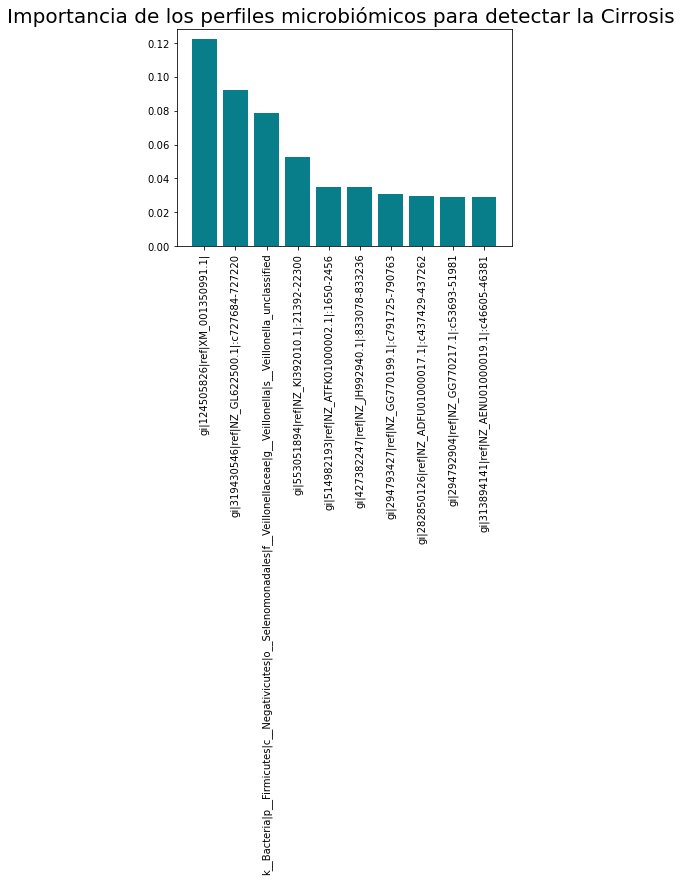

In [153]:
#Definimos el modelo basado en arboles 
model = XGBClassifier(use_label_encoder=False)
# Se entrena la data normalizada con la clase correspondiente a la patología estudiada
model.fit(X_train_norm_fi, Y_train["Cirrhosis"])
importances = pd.DataFrame(data={
    'Attribute': X_train_pp.columns,
    'Importance': model.feature_importances_
})
#Ordenamos segun importancia descendiente
importances = importances.sort_values(by='Importance', ascending=False)
#Obtenemos los 10 primeros atributos mas importantes y visualizamos la información
plt.bar(x=importances[0:10]['Attribute'], height=importances[0:10]['Importance'], color='#087E8B')
plt.title('Importancia de los perfiles microbiómicos para detectar la Cirrosis ', size=20)
plt.xticks(rotation='vertical')
plt.show()

[01:47:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


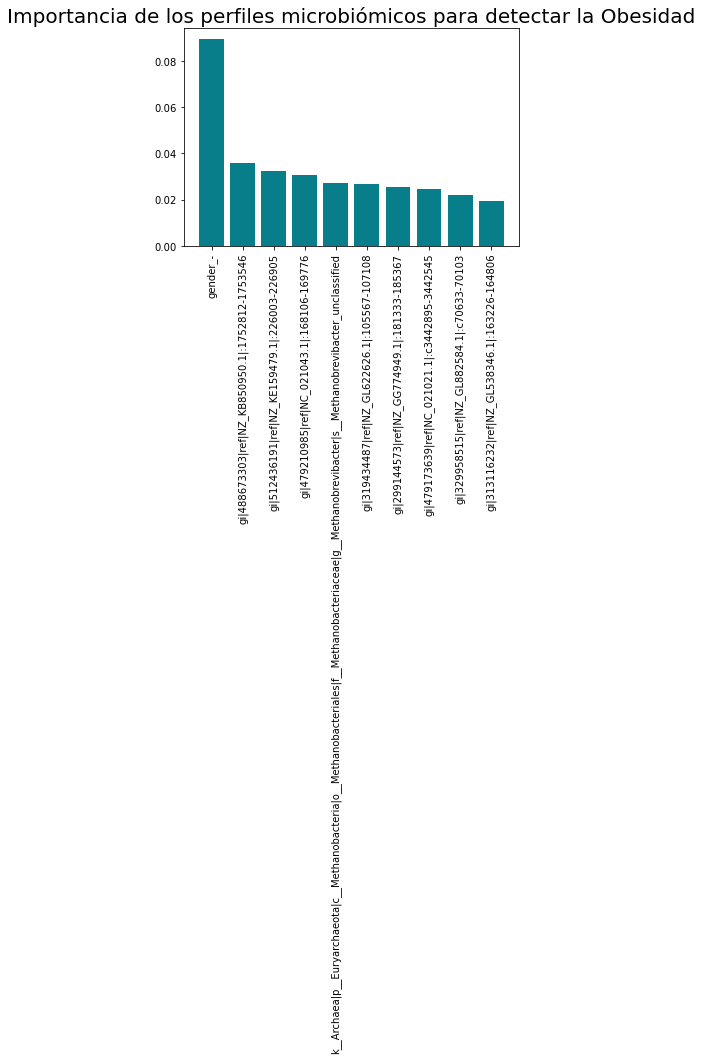

In [152]:
#Definimos el modelo basado en arboles
model = XGBClassifier(use_label_encoder=False)
# Se entrena la data normalizada con la clase correspondiente a la patología estudiada
model.fit(X_train_norm_fi, Y_train["Obesity"])
importances = pd.DataFrame(data={
    'Attribute': X_train_pp.columns,
    'Importance': model.feature_importances_
})
#Ordenamos segun importancia descendiente
importances = importances.sort_values(by='Importance', ascending=False)
#Obtenemos los 10 primeros atributos mas importantes y visualizamos la información
plt.bar(x=importances[0:10]['Attribute'], height=importances[0:10]['Importance'], color='#087E8B')
plt.title('Importancia de los perfiles microbiómicos para detectar la Obesidad', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [130]:
#Analis de los tipos de generos para cada patologia
print(train_abundance[(train_abundance["Obesity"]==1.0)].gender.unique())
print(train_abundance[(train_abundance["Cirrhosis"]==1.0)].gender.unique())
print(train_abundance[(train_abundance["Diabetes"]==1.0)].gender.unique())

['-']
['female' 'male']
['female' 'male']


[00:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


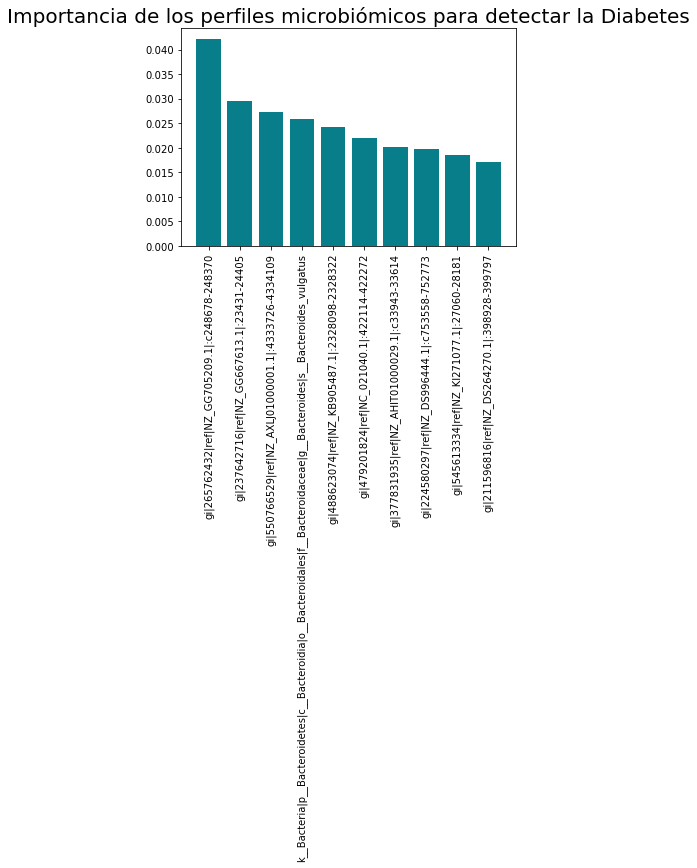

In [109]:
#Definimos el modelo basado en arboles
model = XGBClassifier(use_label_encoder=False)
# Se entrena la data normalizada con la clase correspondiente a la patología estudiad
model.fit(X_train_norm_fi, Y_train["Diabetes"])
importances = pd.DataFrame(data={
    'Attribute': X_train_pp.columns,
    'Importance': model.feature_importances_
})
#Ordenamos segun importancia descendiente
importances = importances.sort_values(by='Importance', ascending=False)
#Obtenemos los 10 primeros atributos mas importantes y visualizamos la infomación
plt.bar(x=importances[0:10]['Attribute'], height=importances[0:10]['Importance'], color='#087E8B')
plt.title('Importancia de los perfiles microbiómicos para detectar la Diabetes', size=20)
plt.xticks(rotation='vertical')
plt.show()

Fuente: https://towardsdatascience.com/3-essential-ways-to-calculate-feature-importance-in-python-2f9149592155

## 10. Submit

In [29]:
######################## Low Variance ########################   
low_var = getter_delete_low_variance(X_train_pp,umbral=0)
X_train_lv = low_var.transform(X_train_pp)
X_test_lv = low_var.transform(X_test_pp)
X_train_lv_df = pd.DataFrame(data=X_train_lv[0:,0:],
              index=[i for i in range(X_train_lv.shape[0])],
              columns=['f'+str(i) for i in range(X_train_lv.shape[1])])
X_test_lv_df = pd.DataFrame(data=X_test_lv[0:,0:],
                index=[i for i in range(X_test_lv.shape[0])],
                columns=['f'+str(i) for i in range(X_test_lv.shape[1])])
######################## End Low Variance ########################   

######################## Data Standarization ########################   
normalizer = get_normalizer(X_train_lv_df)
X_train_norm = normalizer.transform(X_train_lv_df)
X_test_norm = normalizer.transform(X_test_lv_df)
######################## End Data Standarization ########################  

######################## PCA ########################   
pca = PCA(n_components=(25))
pca.fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)
######################## End PCA ########################  

X_train, X_val, y_train, y_val = train_test_split(X_train_pca, Y_train,test_size=0.3,random_state=42)

In [30]:
# Usando PCA con 25 componentes y umbral 0 en lv
params = {"kernel":'linear', "gamma":1, "C":1,"class_weight":"balanced"}
print("Comienza evaluación de modelo")
print(evaluar_modelo(X_train,y_train,model=svm.SVC,X_val=X_val,
                     y_val=y_val,X_test=X_test_pca,params=params,
                     test=test_dm,submit=True,X=X_train_pca,Y=Y_train))

Comienza evaluación de modelo
OneVsRestClassifier(estimator=SVC(C=1, class_weight='balanced', gamma=1,
                                  kernel='linear'))


El archivo submission_to_kaggle.csv es generado automáticamente en la pipeline y está ubicado en la carpeta submissions.

## 11. Conclusiones

1. Tras el análisis realizado, nos dimos cuenta que integrar ciertos features al momento de entrenar los datos puede producir un sesgo significativo como es el caso de gender o code_study, por lo que es fundamental realizar un análisis previo.
2. Según los resultados obtenidos para las 3 patologías, nos dimos cuenta que en cada caso hay una especie de microorganismo en particular que es importante para determinar la enfermedad en cuestión y el resto de atributos corresponden a la presencia de cepas específicas.
3. Hay que considerar el cambio a realizar ante la alta presencia de valores NaN, pues si eliminamos la fila de un dataset ante la presencia de estos valores, puede ocasionar una perdida significativa de datos (problema que se intensifica en este caso donde contamos con pocos datos de entrenamiento), haciendo ineficiente el entrenamiento, para este caso en particular dado que los valores NaN son cepas o especies desconocidas el cambio mas lógico son valores 0. 
4. Se experimentó la importancia de una buena elección de hiperparametros para obtener buenos resultados al momento de entrenar con los modelos seleccionados.
5. Reducir la dimensionalidad es un paso importante para obtener buenos resultados, siempre y cuando se mantenga la información mas relevante, en nuestro caso PCA fue clave.

## 12. Conformidad ética

El trabajo realizado por *Ómicron* es original y está sujeto a todas las reglas descritas en el reglamento de la evaluación.

## 13. Contribución por integrante

1. **Fernanda Avendaño**: 
2. **Diego Quezada**: 
3. **Kevin Reyes**: 